In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [10]:
dir_name = '../daf_metric_results_folder/{}DAF_TPCC_08172020/'
num_daf_threads = ['GC', 'coordinate_daf', '1', '2', '4', '8']
num_worker_threads = ['1', '4', '8', '12', '16', '20']
result_filename = '{}daf_{}worker_result.json'
coor_result_filename = '../coor_metric_results_folder/coor_{}worker_result.json'

In [11]:
def read_daf_txns_per_second(num_daf_t, num_worker_t):
    with open(dir_name.format(num_daf_t) + result_filename.format(num_daf_t, num_worker_t)) as f:
        json_data = json.load(f)
    return json_data['benchmarks'][0]['items_per_second']

In [12]:
def read_txns_per_second(filename, num_worker_t):
    with open(filename.format(num_worker_t)) as f:
        json_data = json.load(f)
    return json_data['benchmarks'][0]['items_per_second']

In [13]:
# read in num txns
ave_num_txns = [[0] * len(num_worker_threads) for _ in range(len(num_daf_threads))]
column_names = ['' for _ in range(len(num_daf_threads))]

i = 0
for daf_t in num_daf_threads:
    if i <= 1:
        column_names[i] = daf_t
    else:
        column_names[i] = '{}_daf_thread'.format(daf_t)
    j = 0
    for worker_t in num_worker_threads:
        if i == 0:
            ave_num_txns[i][j] = read_txns_per_second(ori_result_filename, worker_t)
        elif i == 1:
            ave_num_txns[i][j] = read_txns_per_second(coor_result_filename, worker_t)            
        else:
            ave_num_txns[i][j] = read_daf_txns_per_second(daf_t, worker_t)
        j += 1
    i += 1
df = pd.DataFrame(np.transpose(np.array(ave_num_txns)),columns=column_names)
df.insert(loc=0, column='num_worker_thread', value=num_worker_threads)
print(df)

  num_worker_thread            GC  coordinate_daf  1_daf_thread  \
0                 1  27980.245946    27897.076526  31597.523386   
1                 4  91483.356890    78779.392099  69744.409986   
2                 8  87419.974299   139673.826696  67712.027518   
3                12  82874.612043   187494.707961  66370.627004   
4                16  71095.101548   227264.979603  50043.663096   
5                20  65156.130377   228917.093382  53582.671364   

    2_daf_thread   4_daf_thread   8_daf_thread  
0   30968.621045   28193.355672   24331.285045  
1   91821.321829   87654.230358   80255.694643  
2  108630.562394  161267.563046  142665.054552  
3   99896.192830  153471.903129  178144.936508  
4   84410.148914  121744.106063  177993.743520  
5   82427.999143  124448.343826  180037.245205  


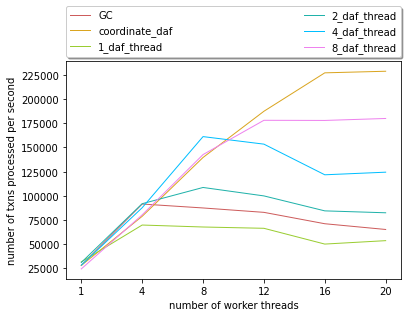

In [15]:
# draw only num_txns
colors = ['indianred', 'goldenrod', 'yellowgreen', 'lightseagreen', 'deepskyblue', 'violet', 'palevioletred']
plt.locator_params(axis='y', nbins=10)
i = 0
for col in column_names:
    plt.plot( 'num_worker_thread', col, data=df, marker='', color=colors[i], linewidth=1.)
    i += 1
plt.xlabel('number of worker threads')
plt.ylabel('number of txns processed per second')
plt.legend(loc='lower left', bbox_to_anchor=(0., 1.02, 1., .102), fancybox=True, shadow=True, ncol=2, mode='expand', borderaxespad=0.)
# use below if y axis labels in scientific notations
# plt.legend(loc='lower left', bbox_to_anchor=(0.08, 1.02, 0.92, .102), fancybox=True, shadow=True, ncol=2, mode='expand', borderaxespad=0.)
plt.savefig('../daf_metric_results_folder/per_sec_num_txns_comp_TPCC.svg', format='svg',  bbox_inches='tight', pad_inches=0.1)
# plt.clf()